In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## data collection
df=pd.read_csv('Real estate.csv',skiprows=1,names=['No','date','Age','nearest_station(km)','convenience stores','latitude','longitude','price'])
df.head()
print(df.shape)

(414, 8)


In [4]:
## check for missing values
df.isnull().sum()

No                     0
date                   0
Age                    0
nearest_station(km)    0
convenience stores     0
latitude               0
longitude              0
price                  0
dtype: int64

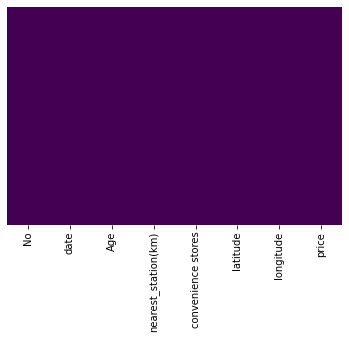

In [5]:
## no null values can also use heat map from seaborn
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
## no values from heat map also

In [6]:
## Before doing feature selection we should do outlier removal
df.describe()

,No,date,Age,nearest_station(km),convenience stores,latitude,longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
# because there is no relevance of No. and date(as age is there) 
df.drop(['No','date'],axis='columns',inplace=True)
# to estimate the effect of outlier removal store correlation matrix
df.corr()

,Age,nearest_station(km),convenience stores,latitude,longitude,price
Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
nearest_station(km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
def outlier_removal(lst,df):
    threshold=3
    for data in lst:
        df_out=pd.DataFrame()
        m = np.mean(df[data])
        s =np.std(df[data])
        reduced_df=df[(df[data] > (m-threshold*s)) & (df[data] <= (m+ threshold*s))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        df=df_out
    return df

In [9]:
df=outlier_removal(df.iloc[:,:5].columns,df)
df

,Age,nearest_station(km),convenience stores,latitude,longitude,price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
402,13.7,4082.01500,0,24.94155,121.50381,15.4
403,5.6,90.45606,9,24.97433,121.54310,50.0
404,18.8,390.96960,7,24.97923,121.53986,40.6
405,8.1,104.81010,5,24.96674,121.54067,52.5


In [10]:
df.corr()

,Age,nearest_station(km),convenience stores,latitude,longitude,price
Age,1.000000,-0.005442,0.058328,0.074299,-0.022585,-0.202301
nearest_station(km),-0.005442,1.000000,-0.612904,-0.626108,-0.767538,-0.671079
convenience stores,0.058328,-0.612904,1.000000,0.452043,0.437134,0.561468
latitude,0.074299,-0.626108,0.452043,1.000000,0.403680,0.552865
longitude,-0.022585,-0.767538,0.437134,0.403680,1.000000,0.495496
price,-0.202301,-0.671079,0.561468,0.552865,0.495496,1.000000


In [11]:
df.describe()

,Age,nearest_station(km),convenience stores,latitude,longitude,price
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,17.624816,1009.594988,4.152334,24.969217,121.534105,38.311057
std,11.427997,1128.187877,2.936334,0.012012,0.014196,13.457294
min,0.000000,23.382840,0.000000,24.932930,121.495070,7.600000
25%,8.900000,289.324800,1.000000,24.963050,121.529825,28.400000
50%,16.000000,492.231300,4.000000,24.971510,121.538850,38.900000
75%,27.800000,1410.633500,6.000000,24.977705,121.543480,46.650000
max,43.800000,4605.749000,10.000000,25.001150,121.566270,117.500000


In [12]:
df.corr()

,Age,nearest_station(km),convenience stores,latitude,longitude,price
Age,1.000000,-0.005442,0.058328,0.074299,-0.022585,-0.202301
nearest_station(km),-0.005442,1.000000,-0.612904,-0.626108,-0.767538,-0.671079
convenience stores,0.058328,-0.612904,1.000000,0.452043,0.437134,0.561468
latitude,0.074299,-0.626108,0.452043,1.000000,0.403680,0.552865
longitude,-0.022585,-0.767538,0.437134,0.403680,1.000000,0.495496
price,-0.202301,-0.671079,0.561468,0.552865,0.495496,1.000000


In [13]:
corrmat=df.corr()
top_cor_features=corrmat.index
top_cor_features

Index(['Age', 'nearest_station(km)', 'convenience stores', 'latitude',
       'longitude', 'price'],
      dtype='object')

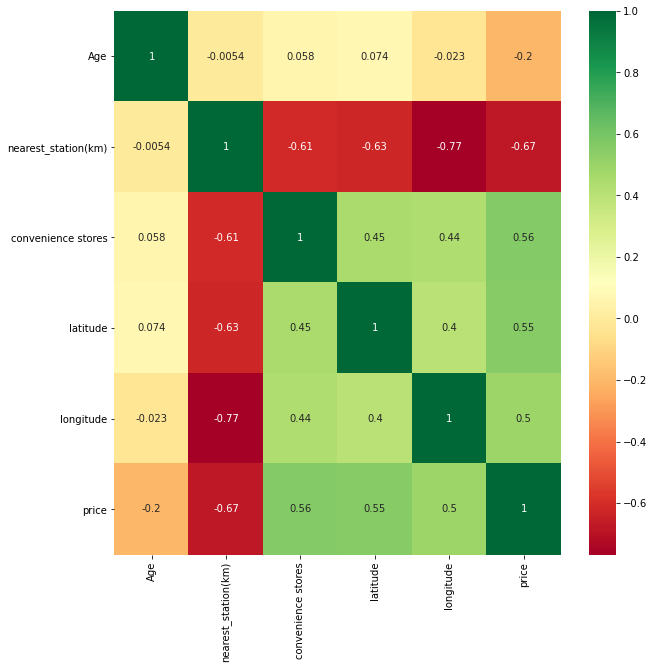

In [14]:
## we also not have categorical values so no need of encodings
## feature selection so that our model should not be overfitted
corrmat = df.corr()
top_cor_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(df[top_cor_features].corr(),annot=True,cmap="RdYlGn")

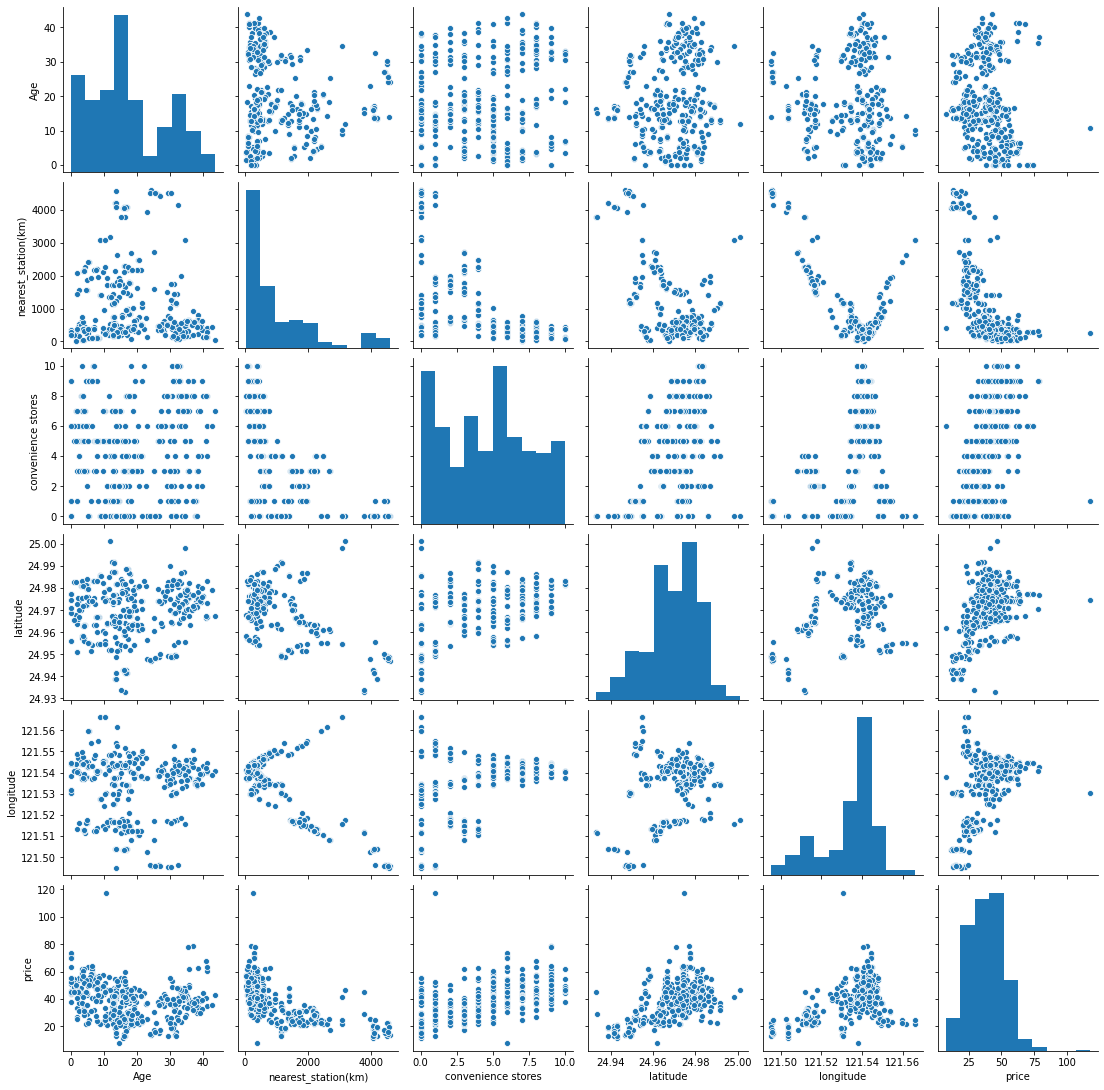

In [15]:
sns.pairplot(data=df)

In [16]:
X=df.iloc[:,:5]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gbreg=GradientBoostingRegressor(n_estimators=100)
gbreg.fit(X_train,y_train)
y_pred=gbreg.predict(X_test)
error=r2_score(y_test,y_pred)
print(error)
print(gbreg.score(X_test,y_test))
# r2_score and score are same

0.5662519416573324
0.5662519416573324
0.7440798836433955
0.7440798836433955
